Carolyn Massa Customer Churn Code - Springboard Capstone Project #1 - All Stages


# Step 1: Import Libraries in Python to Set up Shop.  I then perform Data Collection and Review by scanning in my 10,000 observation Dataset to Jupyter Notebook via python

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd #First I import the necessary libraries necessary to process my data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = None
pd.options.display.max_columns = None
color = sns.color_palette()
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

#Data Visualizations

from IPython.display import display
pd.options.display.max_columns = None
import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.figure_factory as ff
import pandas_profiling as pp
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

from IPython import display
from ipywidgets import interact, widgets

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Importing Misc. Libraries
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
import scipy.stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier



In [3]:
pd.read_csv('bank_churn.csv')#I read my data in using Pandas
code = pd.read_csv('bank_churn.csv')#I assign my dataframe under the name "code"
code.head(5)#I review the first 5 rows to check the data structure and the Column Titles


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
CountryChurnCount = code.groupby('Geography').Exited.sum()#check counts for which countries had the most exit Customers
CountryChurnCount

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64

In [5]:
code.columns #review my variables.

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
code.columns.to_series().groupby(code.dtypes).groups #I need to discover which types of data I will work with

{dtype('int64'): Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure',
        'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'],
       dtype='object'),
 dtype('float64'): Index(['Balance', 'EstimatedSalary'], dtype='object'),
 dtype('O'): Index(['Surname', 'Geography', 'Gender'], dtype='object')}

## Data Exploration and Cleaning - Here I review the types of data I have imported

In [7]:
code.shape #I want to see how many rows and columns of data I have; I see I have 10,000 rows and 14 columns

(10000, 14)

In [8]:
code.nunique()#I will check the count for each type of value

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
code.info() #I reviwed the types of data I have and investige if I have null values(values with no data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
code.isnull().sum() #I show a summary that there are 0 null values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
code.drop(['Surname', 'CustomerId', 'RowNumber'], axis=1,inplace=True) #I want to drop columns that are irrelevant to my data research)

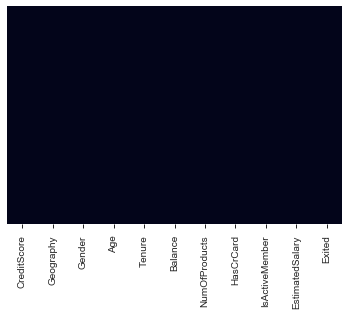

In [12]:
sns.heatmap(code.isnull(), yticklabels=False,cbar=False) #I check via a heatmap for a visual view that there are no ZERO VALUES

In [13]:
code.describe()#I check my date for outliers and see the oldest bank member is 92 and the average age is 38 years with the minimum age 18 years old


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
code.head(5) #I verify these columns have been dropped

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
code['Exited'].value_counts()#I review the actual "Churn" count by doing a "value count"

0    7963
1    2037
Name: Exited, dtype: int64

# Step 2: In this Section I perform Exploratory Data Analysis to check for trends

<function matplotlib.pyplot.show(*args, **kw)>

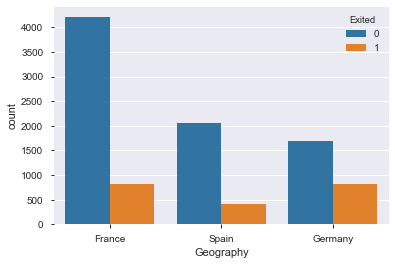

In [16]:
df = code[['Geography','Exited']]
sns.countplot(x='Geography', hue = 'Exited', data = df)
plt.show

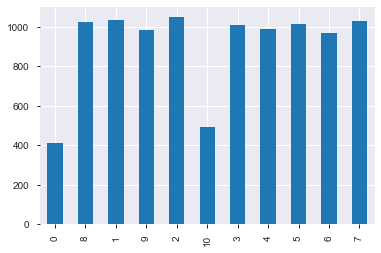

In [17]:
#here I am curious what the tenures by year are we see that year 3 had the highest count (roughly 1100 Clients) and the bank should address those concerns
code1 = code[['Tenure', 'Exited']]
code1.Tenure.value_counts()
counts = code1.Tenure.value_counts(sort=False)
counts.plot(kind='bar')

In [18]:
code.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
code[code['Exited'] == 1].mean() #I seek to understand the averages for my variables who churn

CreditScore           645.351497
Age                    44.837997
Tenure                  4.932744
Balance             91108.539337
NumOfProducts           1.475209
HasCrCard               0.699067
IsActiveMember          0.360825
EstimatedSalary    101465.677531
Exited                  1.000000
dtype: float64

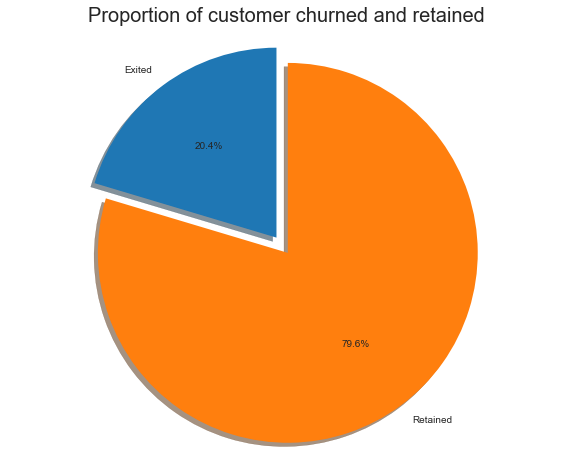

In [20]:
labels = 'Exited', 'Retained'#I want to visualize in a pie chart the proportion of churn vs. retained
sizes = [code.Exited[code['Exited']==1].count(), code.Exited[code['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

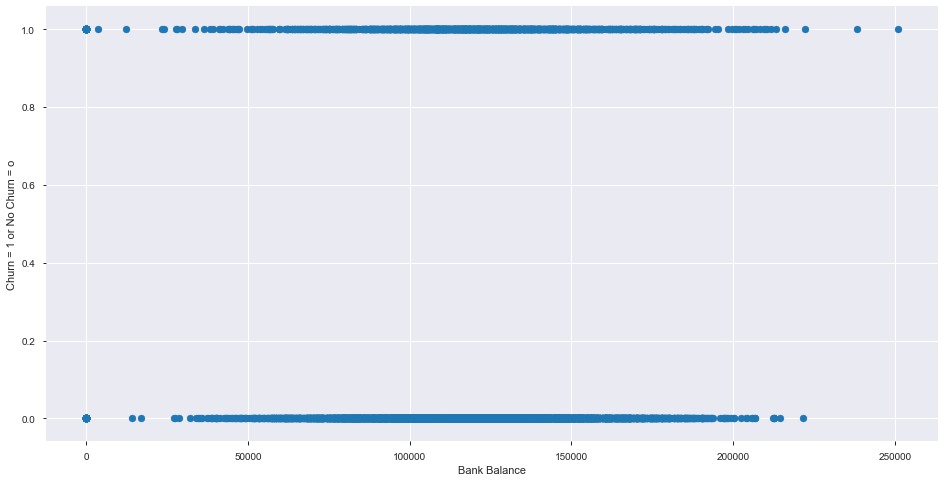

In [21]:
fig, ax = plt.subplots(figsize=(16,8)) #check for outliers in balances that Exited
ax.scatter(code['Balance'], code['Exited'])
ax.set_xlabel('Bank Balance')
ax.set_ylabel('Churn = 1 or No Churn = o')
plt.show()

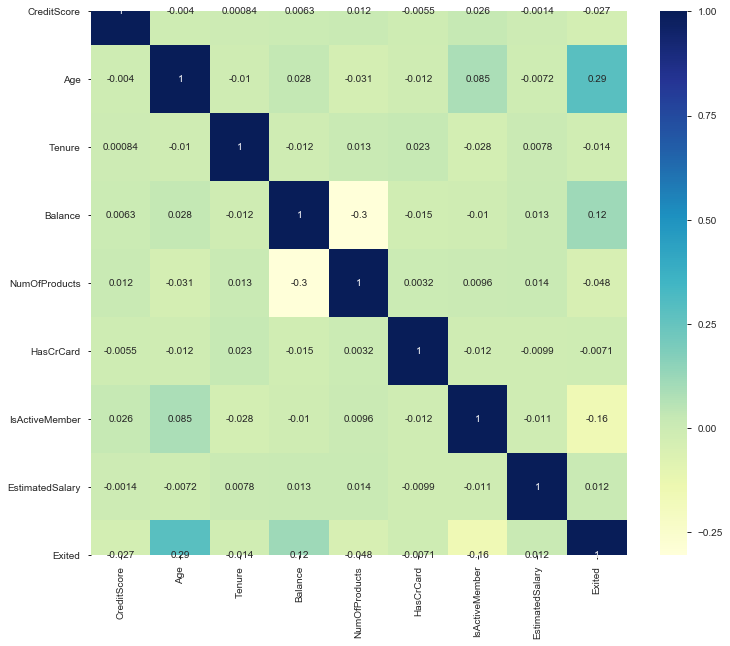

In [22]:
import matplotlib.pyplot as plt #Here I run a Person's R to see if any correlation to discover the highest correlation was age and bank balance
fig,axis = plt.subplots(figsize=(12,10))
axis = sns.heatmap(code.corr(method='pearson', min_periods  =1),annot=True,cmap="YlGnBu")

### Here I take a closer look at the dataset's 11 year Tenure and how it affects customer loss noticing that the highest count was in the 2nd, 4th and 10th years.

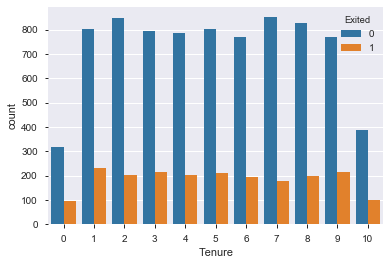

In [23]:
import seaborn as sns 
code = pd.read_csv('bank_churn.csv')
sns.countplot(x='Tenure', hue = 'Exited', data = code)


In [24]:
#I create objects to use in my interactive map to display customer count by country
France = float(code[code['Geography']=='France']['Geography'].count())
Spain = float(code[code['Geography']=='Spain']['Geography'].count())
Germany = float(code[code['Geography']=='Germany']['Geography'].count())
print(France+Spain+Germany)
print(France)
print(Spain)
print(Germany)

10000.0
5014.0
2477.0
2509.0


In [25]:
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)


data = dict(type='choropleth',
           locations=['FRA','ESP','DEU'],
           colorscale='RdYlBu',
           text = ['France','Spain','Germany'],
           z=[France,Spain,Germany],
           colorbar={'title':'number in each geography'})
layout = dict(title='Counting the numbers of each nationality',
              geo=dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data=[data],layout=layout)

In [26]:
#here I review a map according to customer count which is only 3 countries but can be useful if bank expands
iplot(choromap)

<function matplotlib.pyplot.show(*args, **kw)>

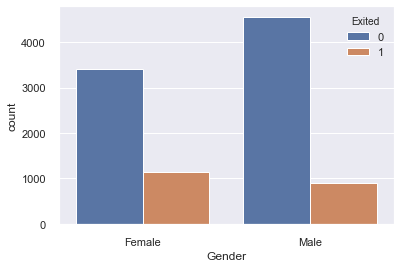

In [27]:
#We see here that more females have churned than males
sns.set(style="darkgrid")
sns.countplot(x='Gender', hue = 'Exited', data = code)
plt.show


In [28]:
code.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<function matplotlib.pyplot.show(*args, **kw)>

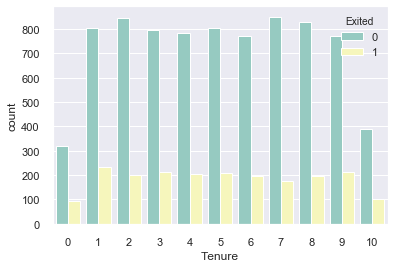

In [29]:
#Here I review the counts for Tenure and it looks like the highest churn rate was in the 2nd, 4th and 10th years of the clients tenure
sns.countplot(x='Tenure', hue = 'Exited', data = code, palette="Set3")
plt.show

In [30]:
code.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


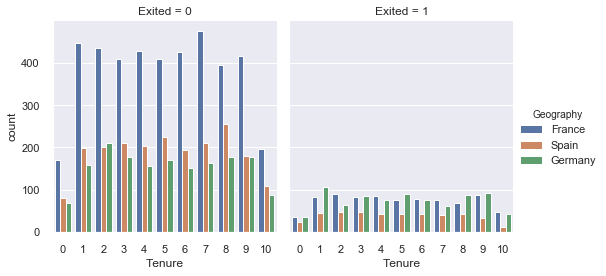

In [31]:
g = sns.catplot(x="Tenure", hue="Geography", col="Exited",
                data=code, kind="count",
                height=4, aspect= .9);

In [35]:

#here I wish to group the Ages to clearly define trends
bins = [ 18, 30, 40, 50, 70, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60-100']
code['GroupedbyAge'] = pd.cut(code.Age, bins, labels = labels,include_lowest = True)
#code['GroupedbyAge'] = pd.cut(code['Age'], bins)
code.head(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,GroupedbyAge
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-49
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-49
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-49
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-39
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-49


In [37]:
bins = [ 0, 25000, 51000, 101000, 151000, 251000] #may not work
labels = ['0-24999', '25000-509999', '60000-100999', '101000-150999', '151000-251000']
code['GroupedbyBalance'] = pd.cut(code.Balance, bins, labels = labels,include_lowest = True)

code.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,GroupedbyAge,GroupedbyBalance
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-49,0-24999
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-49,60000-100999
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-49,151000-251000
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-39,0-24999
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-49,101000-150999


In [39]:
Departed_Bank = code.GroupedbyBalance[code.Exited == 1] #check this code
Current_Bank_Member = code.GroupedbyBalance[code.Exited == 0]
db = len(Departed_Bank)
cbm = len(Current_Bank_Member)

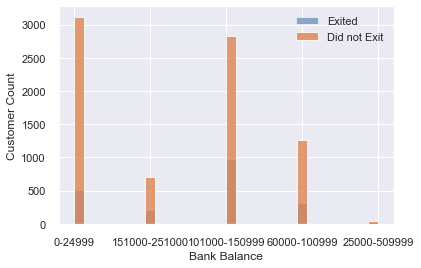

In [40]:
_ = plt.hist(Departed_Bank, bins=30, alpha=0.6, label='Exited')
_ = plt.hist(Current_Bank_Member, bins=30, alpha=0.8, label='Did not Exit')
_ = plt.xlabel('Bank Balance')
_ = plt.ylabel('Customer Count')
_ = plt.legend()

C:\Users\1800r\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



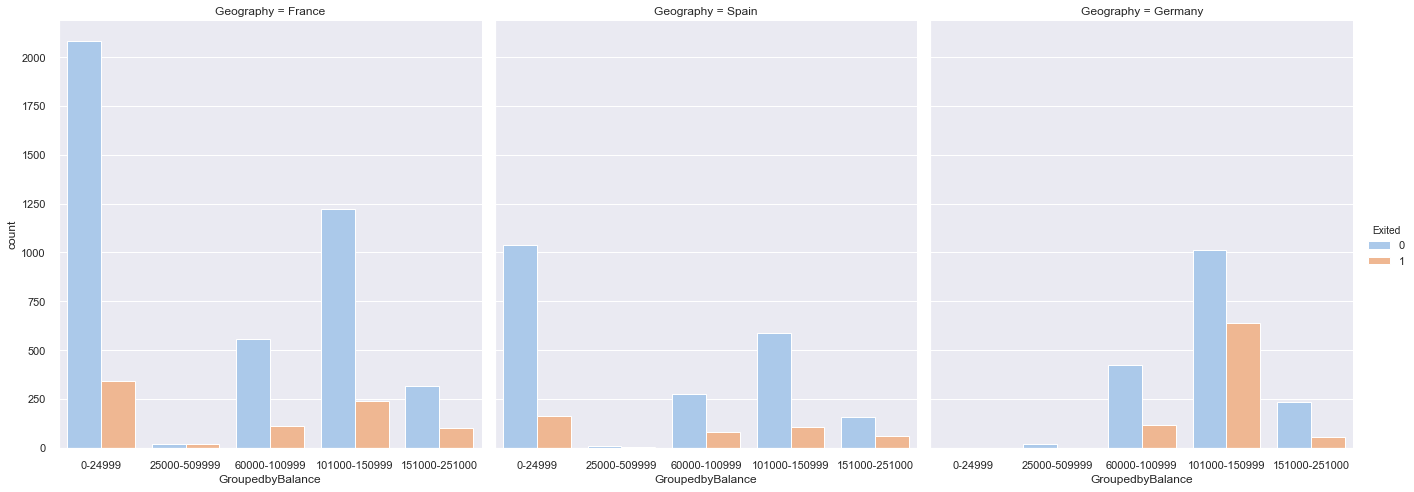

In [41]:
import matplotlib
matplotlib.axes.Axes.secondary_xaxis
matplotlib.axes.Axes.secondary_yaxis
g = sns.catplot(x="GroupedbyBalance", hue="Exited", col="Geography",
                data=code, kind="count",palette="pastel",
                height=4, aspect= .9, size=7)

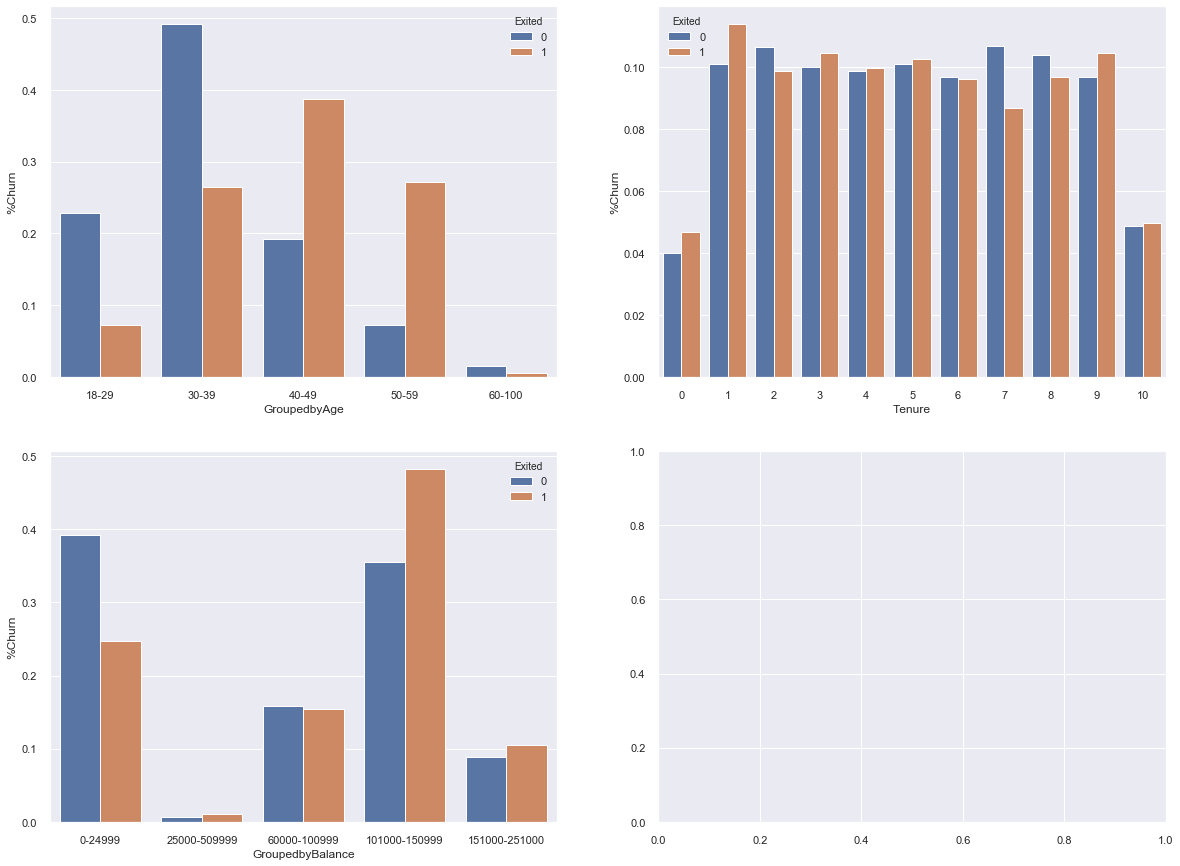

In [42]:
#Here I run three more barplots to check for trends

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

code['%Churn'] = 100 # a dummy column to refer to Exited count
for col, ax in zip(['GroupedbyAge', 'Tenure', 'GroupedbyBalance'], axes.flatten()):
    counts = code.groupby([col, 'Exited']).count()
    freq_per_group = counts.div(counts.groupby('Exited').transform('sum')).reset_index()
    sns.barplot(x=col, y='%Churn', hue='Exited', data=freq_per_group, ax=ax)

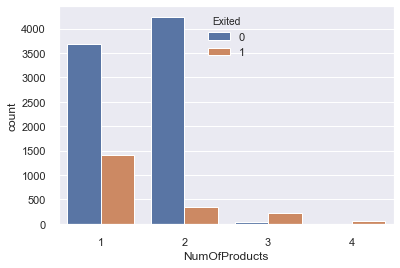

In [43]:

 #It is important to understand the number of products that each account holder had and how it can effect their status
sns.countplot(x='NumOfProducts', hue = 'Exited', data = code)


In [ ]:
#Here I compare Geography to Age and who exited to check for patterns #I want to do counts for churn for all countries
sns.set(style="darkgrid")
sns.barplot(x='Geography', y = 'Age', hue = 'Exited', data = code)



In [ ]:
#Here I want to see how having a bank credit card affects the customer behavior and if having a credit card relating to the bank makes a difference in weather the customer leaves or not
sns.countplot(x='Exited', hue = 'HasCrCard', data = code) 

In [ ]:
g = sns.catplot(x="HasCrCard", hue="Gender", col="Exited", #we see females had credit cards that exited the bank
                data=code, kind="count",
                height=4, aspect= .9);

Text(0, 0.5, 'Customer Churn')

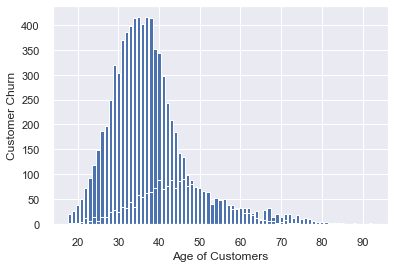

In [44]:
#here I see, again age groupings by Churn
g = code.groupby(['Age', 'Exited']).size().reset_index(name='count') #I need to group the ages then plot them as % against churn like "the highest churn rate was those customers between 35 and 50 with a churn % of 28%, etc"
plt.bar(g['Age'],g['count'])
plt.xlabel('Age of Customers')
plt.ylabel('Customer Churn')

In [ ]:
#Though I would like more detail on what "IsActive Member" actually means I check to see any correlations
sns.countplot(x='Exited', hue = 'IsActiveMember', data = code)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = code, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = code, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = code, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = code, ax=axarr[1][1])

#THIS CODE SHOWS THE RESULTS OF EACH COUNTRY'S Account Holders that churned

#Here I create box plots to examine relavent variables that can effect churn to look for insights such as I discover that those bank members with slightly higher bank balances churned more often. I also notice that those in higher age groups churned at a higher pace as well.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
code = pd.read_csv('bank_churn.csv')
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = code, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = code , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = code, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = code, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = code, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = code, ax=axarr[2][1])

In [ ]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(12, start=.5, rot=-.85, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = code, ax=ax[0])
sns.scatterplot(x = "Age", y = "EstimatedSalary", hue = "Exited", cmap = cmap, sizes = (10, 200), data = code, ax=ax[1])

In [ ]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(12, start=.5, rot=-.85, as_cmap=True)
sns.barplot(x = "Geography", y = "Tenure", hue = "Exited", data = code, ax=ax[0])
sns.barplot(x = "HasCrCard", y = "IsActiveMember", hue = "Exited", data = code, ax=ax[1])

In [ ]:
code.head(5)

#We notice below that of those who left the bank France and Germany has similar proportions with regards to age and gender with Spain having slightly more males that left the bank.

In [ ]:
g = sns.catplot(x="Gender", y="Age",
                hue="Exited", col="Geography",
                data=code, kind="bar",
                height=4, aspect=.7);

# Part 3 Data WranglingFeature Engineering - Here I introduce 3 new variables of those that correlate the most.

In [45]:
from sklearn.model_selection import train_test_split

train_x,test_y = train_test_split(code,test_size=0.30,random_state=42)

train_x.shape


(7000, 17)

In [46]:
code_train = train_x 
code_test = test_y 

code_train.shape
code_test.shape

(3000, 17)

(-1, 5)

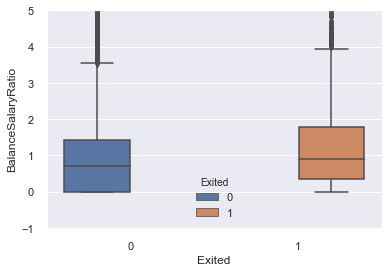

In [47]:
#Here I added in a new variable to show how bank clients with both a higher balance and salary had a slightly higher churn rate
code_train['BalanceSalaryRatio'] = code_train.Balance/code_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = code_train)
plt.ylim(-1, 5)

In [ ]:
#This scatter plot shows more females with higher balances exited the bank
code_train['BalanceSalaryRatio'] = code_train.Balance/code_train.EstimatedSalary
sns.scatterplot(y='BalanceSalaryRatio',x = 'Gender', hue = 'Exited',data = code_train)
plt.ylim(-1, 5)

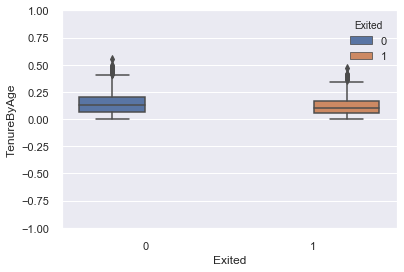

In [48]:
#since Tenure is a function of Age this variable is meant to standardize Tenure over Age
code_train['TenureByAge'] = code_train.Tenure/(code_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = code_train)
plt.ylim(-1, 1)
plt.show()

In [ ]:
#This scatter plot shows more females with higher balances exited the bank
code_train['TenureByAge'] = code_train.Tenure/code_train.Age
sns.scatterplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = code_train)
plt.ylim(-1, 5)

Both "Salary" and "Balance" Require a closer looks as well as "Tenure by Age"so I create a Scatter Plot to look for Insights

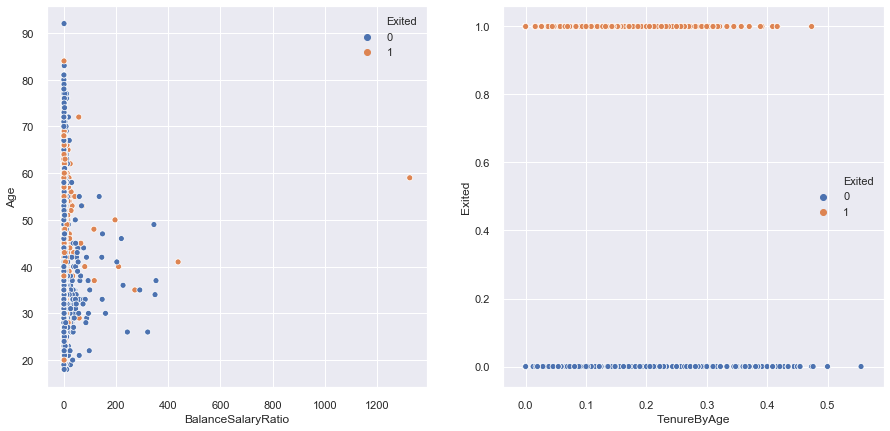

In [49]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(12, start=.5, rot=-.85, as_cmap=True)
sns.scatterplot(x = "BalanceSalaryRatio", y = "Age", hue = "Exited", cmap = cmap, sizes = (10, 200), data = code_train, ax=ax[0])
sns.scatterplot(x = "TenureByAge", y = "Exited", hue = "Exited", cmap = cmap, sizes = (10, 200), data = code_train, ax=ax[1])

In [50]:
import matplotlib.dates as mdates
from datetime import datetime
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper, Slider, Select, NumeralTickFormatter, Span
from bokeh.palettes import Spectral8
from bokeh.layouts import column, widgetbox, row

from bokeh.transform import dodge
from bokeh.core.properties import value
from bokeh.models.tickers import FixedTicker
%matplotlib inline
sns.set()


In [51]:
# Create a function for computing and plotting the ECDF with default parameters
def plot_ecdf(data,title = "ECDF Plot", xlabel = 'Data Values', ylabel = 'Percentage'):
    
    """ 
    Function to plot ecdf taking a column of data as input.
    """
    xaxis = np.sort(data)
    yaxis = np.arange(1, len(data)+1)/len(data)
    plt.plot(xaxis,yaxis,linestyle='none',marker='.')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.margins(0.02)

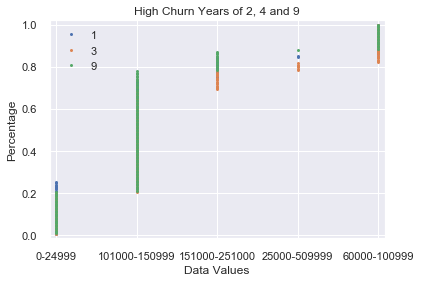

In [57]:
# plotting multiple may be difficult to read but this hows bank balance by each 11 years; seeking a way to show each year w/ Balance and if it churned or not

## set a variable for years
years = code_train.Tenure.unique()


# plot all years of the highest churn which are 1, 3 and 9 in code but years 2,4 and 10 in reality

for Tenure in [1,3,9]:
    plot_ecdf(code_train['GroupedbyBalance'][code_train.Tenure == Tenure][code_train.Exited == 1])
plt.legend(labels=[1,3,9,])
plt.title('High Churn Years of 2, 4 and 9')
plt.show()

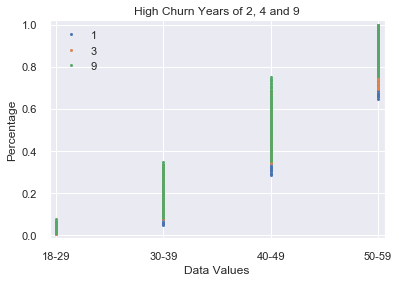

In [58]:
for Tenure in [1,3,9]:
    plot_ecdf(code_train['GroupedbyAge'][code_train.Tenure == Tenure][code_train.Exited == 1])
plt.legend(labels=[1,3,9])
plt.title('High Churn Years of 2, 4 and 9')
plt.show()

In [ ]:
years


In [ ]:
code_train.drop(['Surname', 'CustomerId', 'RowNumber'], axis=1,inplace=True)

In [ ]:
code_train.head(5)

In [ ]:
yrs123 = code_train[(code_train.Tenure == 1) & (code_train.Tenure == 3)]
yrs123.head(5)

In [ ]:
#I introduce a variable to show the credit score behavior versus age 
code_train['CreditScoreGivenAge'] = code_train.CreditScore/(code_train.Age)
sns.boxplot(y='CreditScoreGivenAge',x = 'Exited', hue = 'Exited',data = code_train)
plt.ylim(-1, 1)
plt.show()

In [ ]:
#I now will change the variable for two variables from 0 (does not have Credit Card or does not have Product to a -1 to show the negative relationship)
code_train.loc[code_train.HasCrCard == 0, 'HasCrCard'] = -1
code_train.loc[code_train.IsActiveMember == 0, 'IsActiveMember'] = -1
code_train.head()


In [ ]:
code_train.head(5)

In [ ]:
#since we had high Churn rates in 3 years I need to see the counts which are about 2100 that churned in years 
code_train["HighChurnYears"] = code_train["Tenure"].isin(["1", "3", "9"])
code_train.HighChurnYears.value_counts()
counts = code_train.HighChurnYears.value_counts(sort=False)
counts.plot(kind='bar')

In [ ]:
#I create new object to organize by variables by continuous and categorical
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Gender', 'Geography']
code_train = code_train[['Exited'] + continuous_vars + cat_vars]
code_train.head()

In [ ]:
#Here I use Normalization to scale my continuous variables.
minVec = code_train[continuous_vars].min().copy()
maxVec = code_train[continuous_vars].max().copy()
code_train[continuous_vars] = (code_train[continuous_vars]-minVec)/(maxVec-minVec)
code_train.head()

In [ ]:
#  Here I hot encoded the categorical variables for easier distinguishment between Gender and countries since they need to BECOME categorical
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (code_train[i].dtype == np.str or code_train[i].dtype == np.object):
        for j in code_train[i].unique():
            code_train[i+'_'+j] = np.where(code_train[i] == j,1,-1)
        remove.append(i)
code_train = code_train.drop(remove, axis=1)
code_train.head()

In [ ]:
import numpy as np

# data prep pipeline for test data so I can transform the data from one representation to the other
#need to resolve the hot encoding issue to add that into my chain

def codePrepPipeline(code_predict,code_train_Cols,minVec,maxVec):
    # Add new features
    code_predict['BalanceSalaryRatio'] = code_predict.Balance/code_predict.EstimatedSalary
    code_predict['TenureByAge'] = code_predict.Tenure/(code_predict.Age - 18)
    code_predict['CreditScoreGivenAge'] = code_predict.CreditScore/(code_predict.Age - 18)
    # Reorder the columns
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 
    code_predict = code_predict[['Exited'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    code_predict.loc[code_predict.HasCrCard == 0, 'HasCrCard'] = -1
    code_predict.loc[code_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One hot encode the categorical variables
    #since this is not running I need to replace it with my ONEHOTENCODING code
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in code_predict[i].unique():
            code_predict[i+'_'+j] = np.where(code_predict[i] == j,1,-1)
        remove.append(i)
    code_predict = code_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(code_train_Cols) - set(code_predict.columns))
    for l in L:
        code_predict[str(l)] = -1        
    # MinMax scaling coontinuous variables based on min and max from the train data
    code_predict[continuous_vars] = (code_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    code_predict = code_predict[code_train_Cols]
    return code_predict


In [ ]:
code_train.head(5)

Below I import the necessary libraries to run my 3 chosen models

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_extraction import DictVectorizer



In [ ]:
#I define how to display my scores 
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)


In [ ]:
import numpy as np 
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(code_train.loc[:, code_train.columns != 'Exited'],code_train.Exited)
best_model(SVM_grid)

In [ ]:
#Logistic Regression with with degree 2 polynomial kernel using Train data
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='warn',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(code_train.loc[:, code_train.columns != 'Exited'],code_train.Exited)

In [ ]:
#Logistic Regression with with degree 2 polynomial kernel using Train data
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='warn',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(code_train.loc[:, code_train.columns != 'Exited'],code_train.Exited)

In [ ]:
code_train.head(4)

In [ ]:
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(code_train.loc[:, code_train.columns != 'Exited'],code_train.Exited)

In [ ]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(code_train.loc[:, code_train.columns != 'Exited'],code_train.Exited)

In [ ]:
print(classification_report(code_train.Exited,  SVM_RBF.predict(code_train.loc[:, code_train.columns != 'Exited'])))

In [ ]:
#Review best model fit accuracy : My primary focus is on the performance in predicting 1's (Customers who churn)¶
print(classification_report(code_train.Exited,  RF.predict(code_train.loc[:, code_train.columns != 'Exited'])))

In [ ]:
#I run a comparison plot to compare the accuracies of my 3 models which the Random Forest performed better
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score:' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_log_primal, tpr_log_primal, label = 'Logistic Regression: ' + str(round(auc_RF, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

### Testing the 3 models for my test data set

In [ ]:
#Here I make the transistion from the Training data to testing data

#TRAIN TO TEST  

code_test = codePrepPipeline(code_test,code_train.columns,minVec,maxVec)
code_test = code_test.mask(np.isinf(code_test))
code_test = code_test.dropna()
code_test.shape

In [ ]:
code_test.columns

In [ ]:
#Logistic Regression  using TEST DATA
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='warn',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(code_test.loc[:, code_test
                             .columns != 'Exited'],code_test.Exited)

In [ ]:
print(classification_report(code_test.Exited, log_primal.predict(code_test.loc[:, code_test.columns != 'Exited'])))

In [ ]:
#Support Vector Model with RBF Kernal w/o GridSearchCV
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(code_test.loc[:, code_test.columns != 'Exited'],code_test.Exited)

In [ ]:
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(code_test.loc[:, code_test.columns != 'Exited'],code_test.Exited)
best_model(SVM_grid)

In [ ]:
print(classification_report(code_test.Exited,  SVM_RBF.predict(code_test.loc[:, code_test.columns != 'Exited'])))

In [ ]:
#Random Forest

RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(code_test.loc[:, code_test.columns != 'Exited'],code_test.Exited)
print(RF.feature_importances_)
code_test.columns


In [ ]:
print(classification_report(code_test.Exited,  RF.predict(code_test.loc[:, code_test.columns != 'Exited'])))

In [ ]:
y = code_test.Exited
X = code_test.loc[:, code_test.columns != 'Exited']
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])

 It is important to compare the 3 models to compare what worked best and we see that the Random Forest worked best for this particular problem.

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_log_primal, tpr_log_primal, label = 'Logistic Regression: ' + str(round(auc_log_primal, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

import pylab as pl
y_true = code_test.Exited
y_pred = RF.predict(code_test.loc[:, code_test.columns != 'Exited'])
cm = confusion_matrix(y_true, y_pred)
cm

In [ ]:
def plot_conf_matrix(y_true,y_pred,labels):
    cm = confusion_matrix(y_true,y_pred,labels)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    pl.title('confusion matrix')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    pl.xlabel('Predicted')
    pl.ylabel('True')
    pl.show(cm) 




In [ ]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#Loading the dataset
df = code_test

X = code_test.loc[:, code_test.columns != 'Exited']   #Feature Matrix
y = code_test.Exited           #Target Variable
df.head()



In [ ]:
#Using Pearson Correlation with our test data to find P values
plt.figure(figsize=(12,10))
cor = code_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable #we see that age, balance and if the customer was an active member where the most important 
cor_target = abs(cor["Exited"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]
relevant_features

In [ ]:
print(code_test[["Balance","EstimatedSalary"]].corr())
print(code_test[["Tenure","Age"]].corr())

In [ ]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues


In [ ]:
From the analysis above we see that both "Balance" and "BalanceSalaryRatio" have a P Value less than .05

In [ ]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

In [ ]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)


In [ ]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

In [ ]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Here Lasso model has taken the features Balance Salary Ratio and its components which are Balance and Salary

We saw how to select features using multiple methods for Numeric Data and compared their results. Now there arises a confusion of which method to choose in what situation. Following points will help you make this decision.
Filter method is less accurate. It is great while doing EDA, it can also be used for checking multi co-linearity in data.
Wrapper and Embedded methods give more accurate results but as they are computationally expensive, these method are suited when you have fewer features (~20).
